# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare
from scipy.stats import ttest_ind

###################################################################################
# Comment these lines if you're going to use the .csv file instead of PostgreSQL
###################################################################################
import psycopg2
from data_preparation import DataPreparation

In [2]:
style.use('fivethirtyeight')

In [3]:
###################################################################################
# Comment these lines if you're going to use the .csv file instead of PostgreSQL
###################################################################################
dp = DataPreparation()
dp._read_data()
df = dp._data
# just to create the dump for Deepthi
# df.to_csv('deepthi.csv')

###################################################################################
# Uncomment these lines if you're going to use the .csv file instead of PostgreSQL
###################################################################################
# df = pd.read_csv('./deepthi.csv')

Convert target variable to numeric

In [4]:
df.died = df.died.map(lambda x: float(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758 entries, 0 to 6757
Data columns (total 36 columns):
parish_name              6758 non-null object
qn204_know               6758 non-null object
qn209b_know              6758 non-null object
qn210_know               6758 non-null object
qn211a_know              6758 non-null object
qn211b_know              6758 non-null object
qn211c_know              6758 non-null object
qn216_know               6758 non-null object
qn217_know               6758 non-null object
qn302c_mal               6733 non-null object
qn303c_mal               6733 non-null object
qn304c_mal               6733 non-null object
qn320c_mal               6733 non-null object
qn502c_dia               6733 non-null object
qn503c_dia               6733 non-null object
qn505ca_dia              6733 non-null object
qn505cb_dia              6733 non-null object
qn506cb_dia              6733 non-null object
qn507c_dia               6733 non-null object
qn510c_dia         

In [6]:
df.iloc[:, 30:]

,qn1009_hhw,totalshops_village,shop_village,mchildren2008_village,childid,died
0,2.0,0.0,0.0,8.0,1,0.0
1,2.0,0.0,0.0,8.0,2,0.0
2,1.0,0.0,0.0,8.0,1,0.0
3,1.0,0.0,0.0,8.0,2,0.0
4,0.0,0.0,0.0,8.0,3,0.0
5,0.0,0.0,0.0,8.0,4,0.0
6,0.0,0.0,0.0,8.0,1,0.0
7,0.0,0.0,0.0,8.0,2,0.0
8,2.0,0.0,0.0,8.0,1,0.0
9,0.0,0.0,0.0,8.0,2,0.0


## Run statistical tests against each column

Convert numberic variables to number data types

In [7]:
df.qn206_totmalflag5 = df.qn206_totmalflag5.map(lambda x: int(x))
df.qn1001_hhw = df.qn1001_hhw.map(lambda x: None if x=='' else float(x))
df.qn1009_hhw = df.qn1009_hhw.map(lambda x: None if x=='' else float(x))
df.qn01_103 = df.qn01_103.map(lambda x: None if pd.isnull(x) else float(x))
df.totalshops_village = df.totalshops_village.map(lambda x: float(x))

AttributeError: 'DataFrame' object has no attribute 'qn206_totmalflag5'

For each categorical feature we run a separate statistical test:

* If the feature has more than 2 levels we run a Chi-squared test
* If the feature has 2 levels we run a z-test
* If the feature has less than 2 levels no test in possibile

**Missing answers** are coded differently than negative answers.

For each numerical variable a separate t-test is run.

In [8]:
def encode_missing_answers(feature):
    df[feature] = df[feature].map(lambda f: 'missing' if f=='' else f)

In [9]:
def encode_null_values(feature):
    df[feature] = df[feature].map(lambda f: 'missing' if pd.isnull(f) else f)

In [10]:
def count_number_of_levels(feature):
    return len(df.groupby(feature).count().index.tolist())

In [11]:
def z_test_two_proportions(feature):
    print
    print 'Group proportions for feature %s:' % feature
    print
    print df.groupby(feature).mean()['died']
    successes = np.array(df.groupby(feature).sum()['died'])
    trials = np.array(df.groupby(feature).count()['died'])
    z_statistic, p_value = proportions_ztest(successes, trials, value=0, alternative='two-sided')
    print
    print 'z_test of difference in proportions has %2.3f p-value.' % p_value
    print
    return p_value

In [12]:
def chisquare_test_N_proportions(feature):
    print
    print 'Group proportions for feature %s:' % feature
    print
    print df.groupby(feature).mean()['died']
    successes = np.array(df.groupby(feature).sum()['died'])
    trials = np.array(df.groupby(feature).count()['died'])
    chisq = proportions_chisquare(successes, trials)
    z_statistic, p_value = chisq[0:2]
    print
    print 'z_test of difference in proportions has %2.3f p-value.' % p_value
    print
    return p_value

In [13]:
def t_test_means(feature):
    prop_nas = np.mean(df[feature].isnull())
    if prop_nas > 0.10:
        return None
    df[feature] = df[feature].fillna(np.mean(df[feature]))
    print
    print 'Group means for feature %s:' % feature
    print df.groupby('died').agg({feature: [np.mean]})[feature]['mean']
    a = df[df.died==1.0][feature]
    b = df[df.died==0.0][feature]
    t_statistic, p_value = ttest_ind(a, b, axis=0, equal_var=True)
    print
    print 't_test of difference in means has %2.3f p-value.' % p_value
    return p_value

In [14]:
def run_test(feature):
    print
    print
    print
    print 'Testing feature %s' % feature
    p_value = None
    if np.any(df[feature] == ''):
        encode_missing_answers(feature)
    if np.any(df[feature].isnull()):
        encode_null_values(feature)
    num_levels = count_number_of_levels(feature)
    if num_levels>2:
        p_value = chisquare_test_N_proportions(feature)
    elif num_levels==2:
        p_value = z_test_two_proportions(feature)
    else:
        print '%s has %d levels' % (feature, num_levels)
    return p_value

In [15]:
categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
quantitative_features = df.dtypes[df.dtypes != 'object'].index.tolist()
quantitative_features.remove('died')
test_results = []
for cf in categorical_features:
    test_results.append((cf, run_test(cf)))
for qf in quantitative_features:
    test_results.append((qf, t_test_means(qf)))




Testing feature parish_name

Group proportions for feature parish_name:

parish_name
BUBEZI             0.032787
BUDUMBULI EAST     0.117647
BUDUMBULI WEST     0.100000
BUGEMBE WARD       0.036364
BUMOOZI            0.055215
BUWEKULA           0.055233
BUWENDA            0.114688
KAFUMU             0.026820
KAKOOLA            0.050167
KATENDE            0.074074
KATENDE WARD       0.142857
KONKOMA            0.031250
KYALI              0.022167
LWANGA             0.040984
MAFUBIRA           0.055866
MAWOITO            0.044118
MAZIBA             0.039387
NAKANYONYI         0.051282
NAKANYONYI WARD    0.057377
NAMULESA           0.048649
WANYAMA            0.120690
WANYAMA WARD       0.043716
WANYANGE           0.073232
WARD A             0.045016
WARD B             0.028571
WARD C             0.015873
WARD D             0.021277
Name: died, dtype: float64

z_test of difference in proportions has 0.000 p-value.




Testing feature qn204_know

Group proportions for feature qn204_know:

In [16]:
test_results.sort(key = lambda x: x[1])
test_results

[('qn302c_mal', 3.0983556946459086e-87),
 ('qn502c_dia', 3.5260238878914835e-63),
 ('childid', 1.0270595913005262e-15),
 ('parish_name', 3.8770528848572744e-11),
 ('qn603c_fort', 1.3533358871098915e-10),
 ('shop_village', 4.9017612035980309e-06),
 ('qn606c_fort', 5.4337970377714163e-06),
 ('totalshops_village', 2.0845711294310287e-05),
 ('qn217_know', 4.1734943291762372e-05),
 ('mchildren2008_village', 7.755394257361422e-05),
 ('qn304c_mal', 0.00041433833672926165),
 ('qn303c_mal', 0.00072108789861500405),
 ('qn216_know', 0.0024811452720023995),
 ('qn1009_hhw', 0.009956056732507353),
 ('qn1002_hhw', 0.010025559581432253),
 ('qn505cb_dia', 0.010348836999760783),
 ('qn512c_dia', 0.013914326479381138),
 ('qn204_know', 0.015732693976202028),
 ('qn727_chp', 0.020978437698729552),
 ('qn510c_dia', 0.021795189509683319),
 ('qn210_know', 0.023659893496828725),
 ('qn505ca_dia', 0.023943674599862078),
 ('qn503c_dia', 0.024230550731074486),
 ('qn211a_know', 0.027190714743146108),
 ('qn209b_know', 

## Plot results

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
def plot_features_p_values(test_results, p_value_threshold): 
    res = pd.DataFrame(test_results, columns=['feature','p_value'])
    res.p_value = res.p_value.map(lambda x: 1 if pd.isnull(x) else x)
    res.sort_values(by='p_value', inplace=True)

    fig, ax = plt.subplots(figsize=(16, 25))

    bar_pos = np.arange(res.shape[0])

    palette = np.array(['green', 'red'])
    colors = palette[1* (res.p_value > p_value_threshold)]
                       
    rects = ax.barh(bar_pos, res.p_value,
                     align='center',
                     height=0.5, color=colors,
                     tick_label=res.feature)
    
    ax.set_xlabel('p_value', fontsize=14)
    ax.set_title('RCT questions p_values for correlation to child mortality', fontsize=20)
    
    ax.axvline(x=p_value_threshold, linestyle='dashed', color='darkgrey', alpha=0.5)
    
    fig.savefig('./test_results.png')

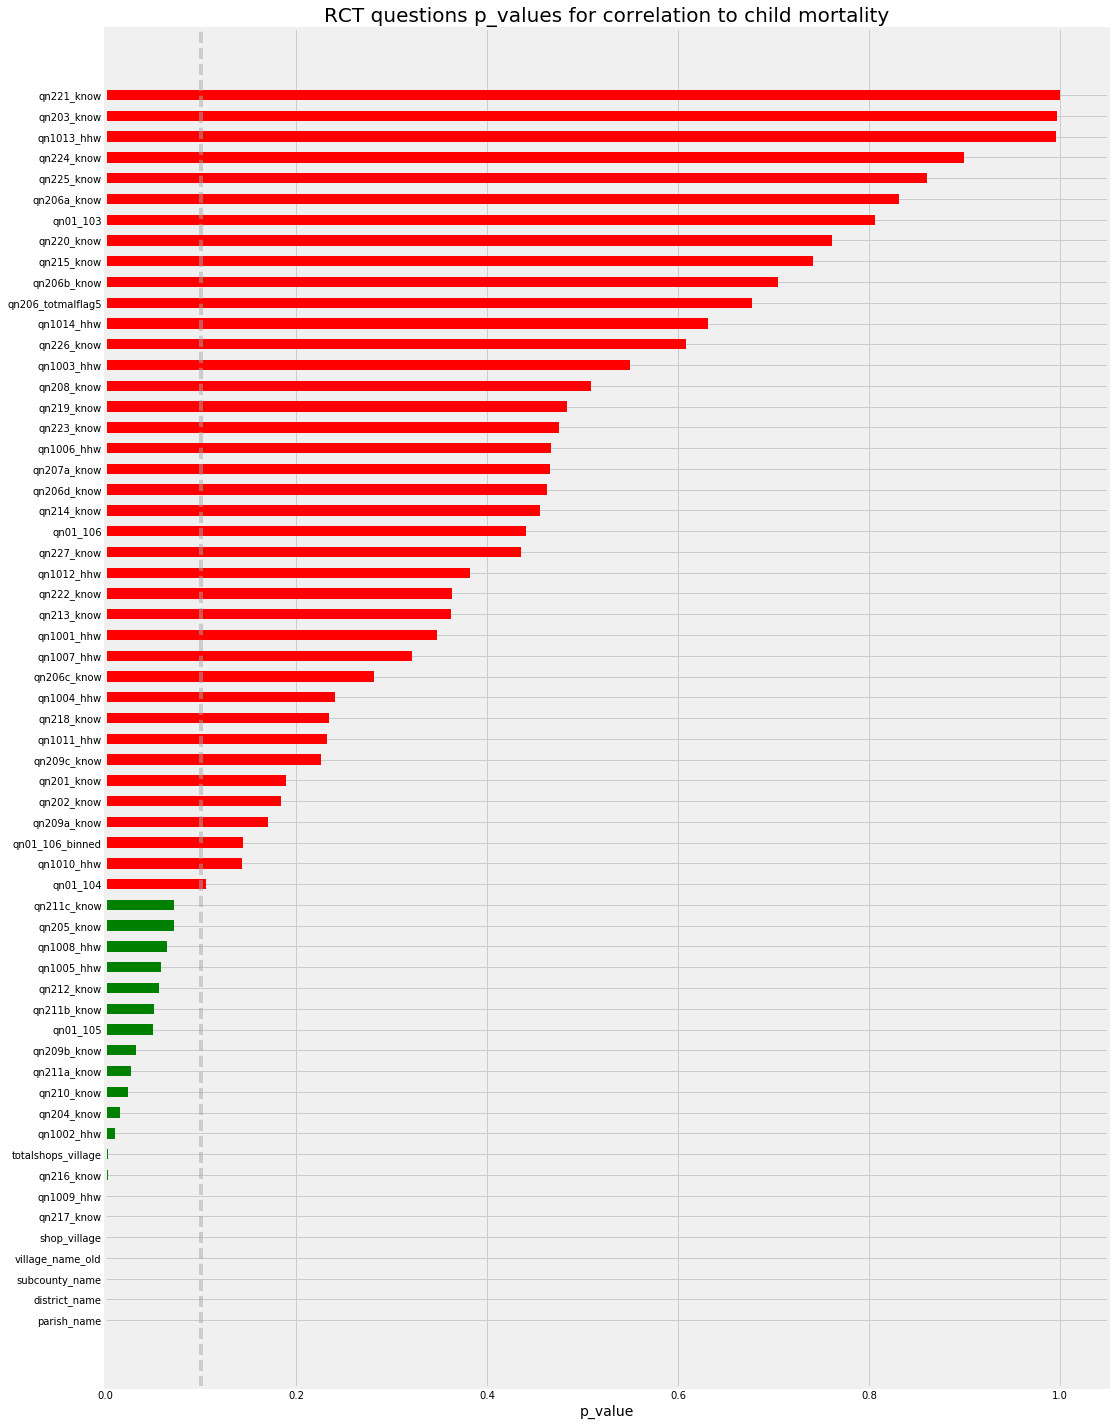

In [33]:
plot_features_p_values(test_results, 0.10)

In [34]:
def plot_feature_proportions(feature):
    labels = df.groupby(feature).mean()['died'].index.values
    prop = df.groupby(feature).mean()['died'].values
    size = df.groupby(feature).count()['died'].values
    se = np.sqrt((prop * (1 - prop)) / size)

    fig, ax = plt.subplots(figsize=(9,7))
    N = np.arange(len(labels))
    rects1 = ax.bar(N, prop, yerr=se, color='cornflowerblue')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Proportion', fontsize=14)
    ax.set_title('Proportion of deaths by category for %s' % feature, fontsize=20)
    ax.set_xticklabels(labels, rotation='vertical')
    plt.tight_layout()
    fig.savefig('./'+feature+'.png')

/Users/stefanobrunelli/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


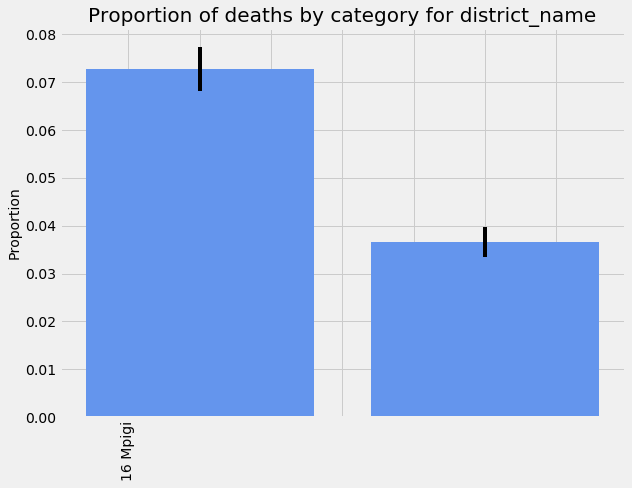

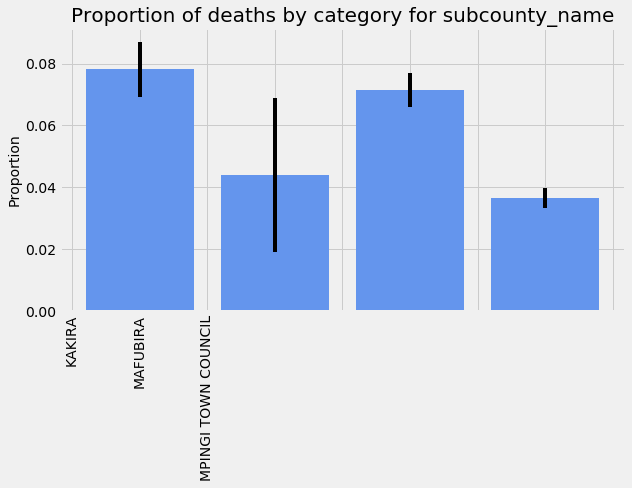

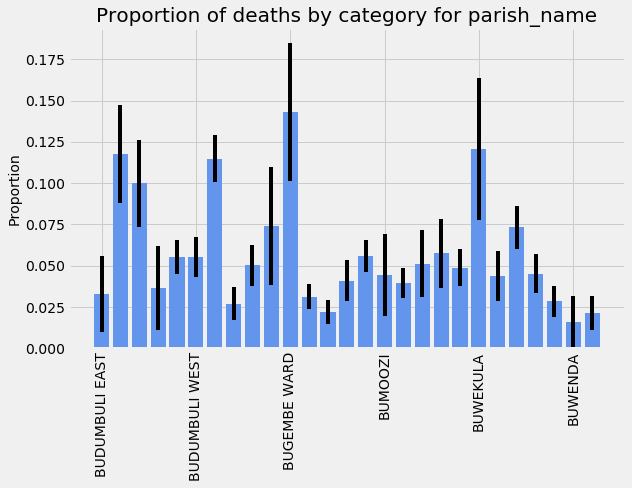

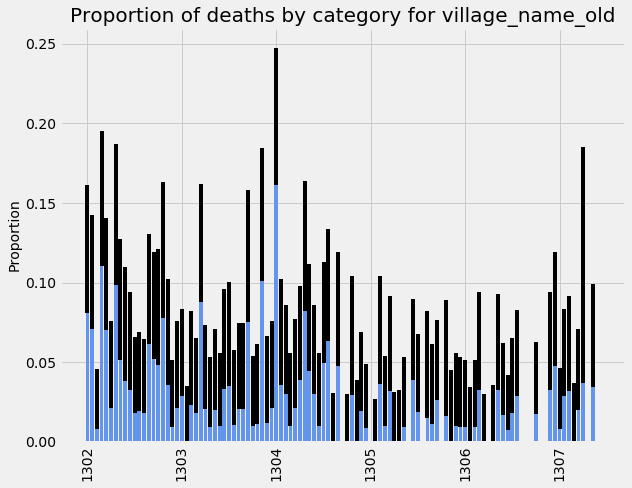

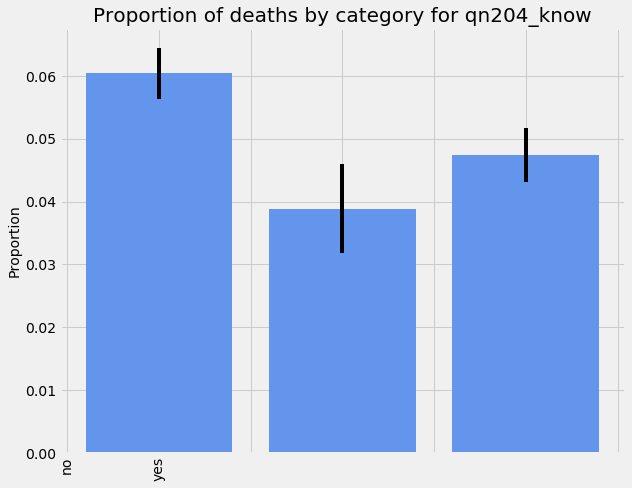

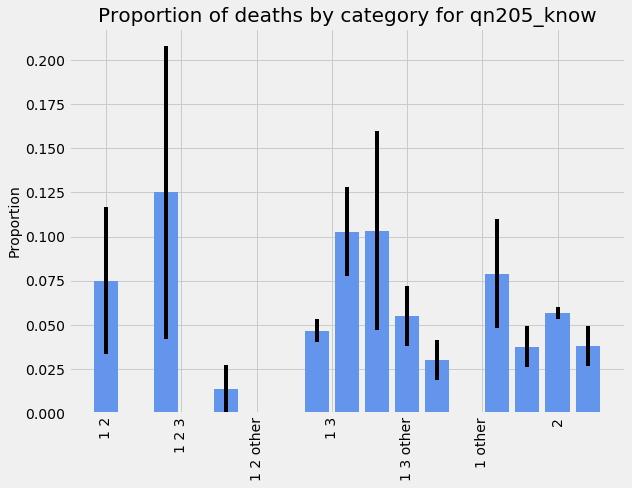

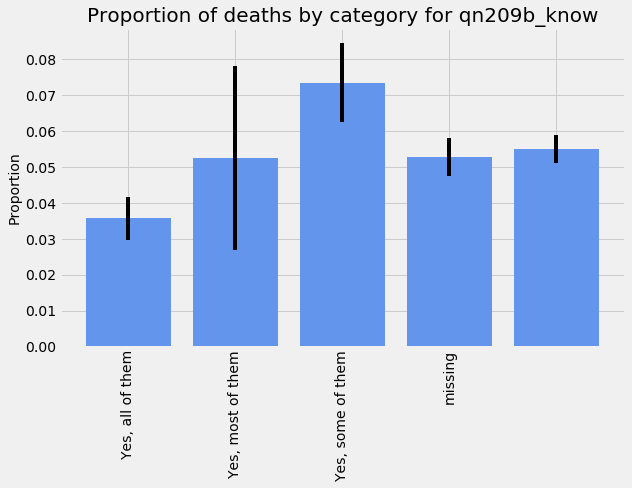

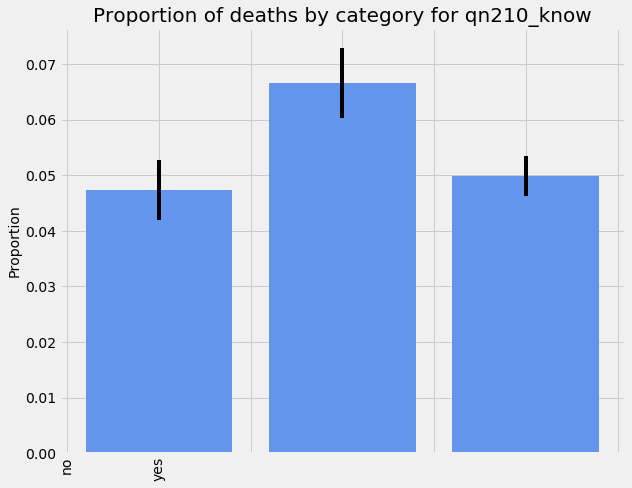

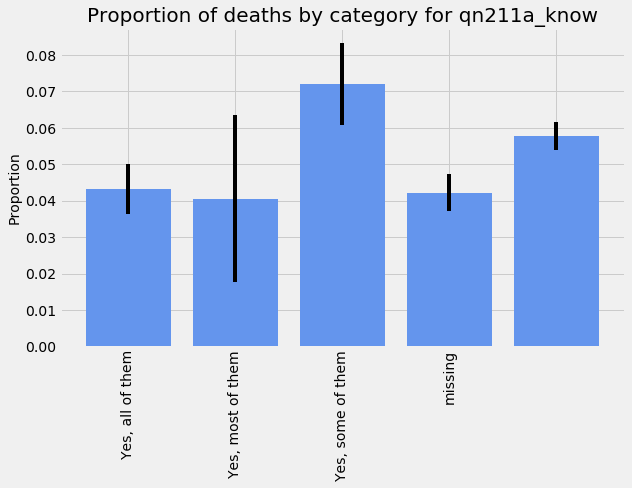

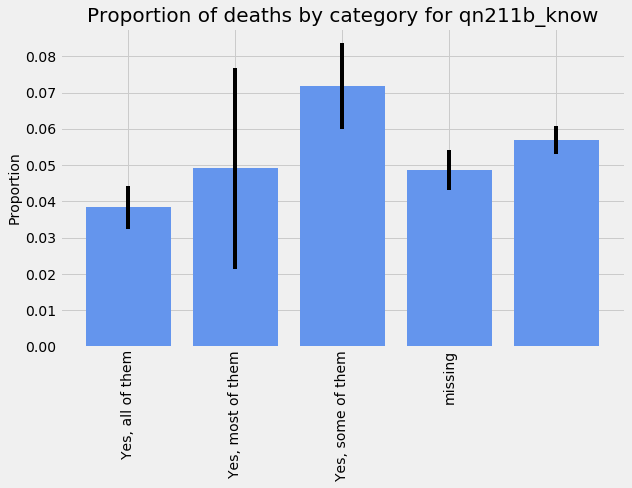

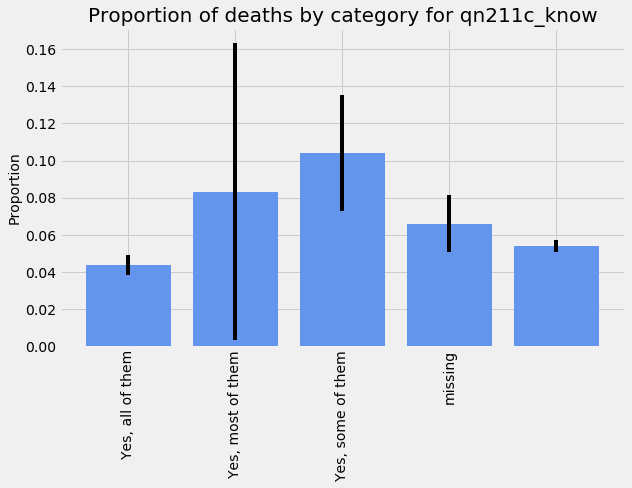

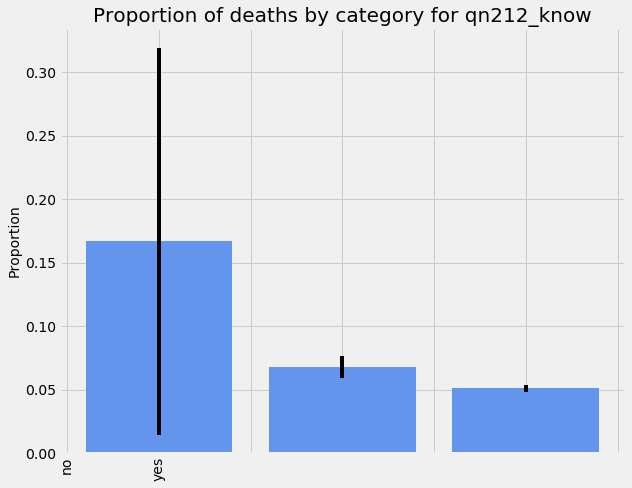

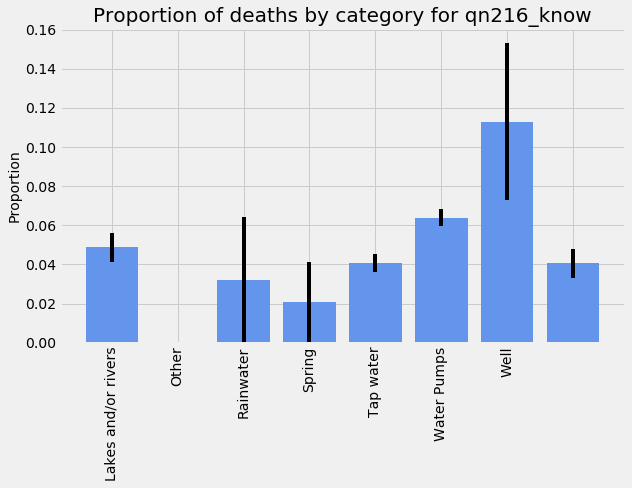

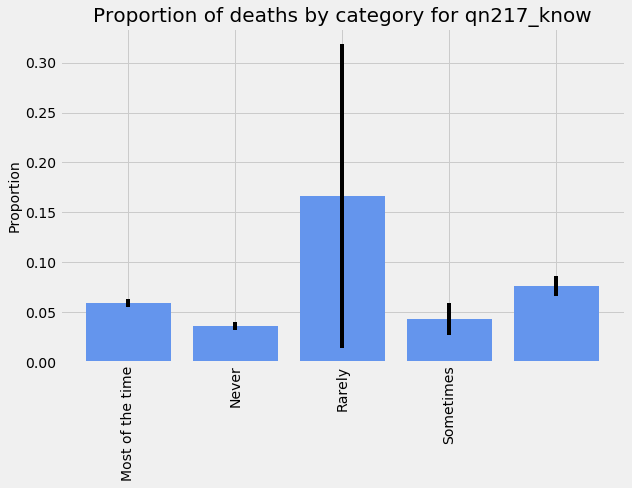

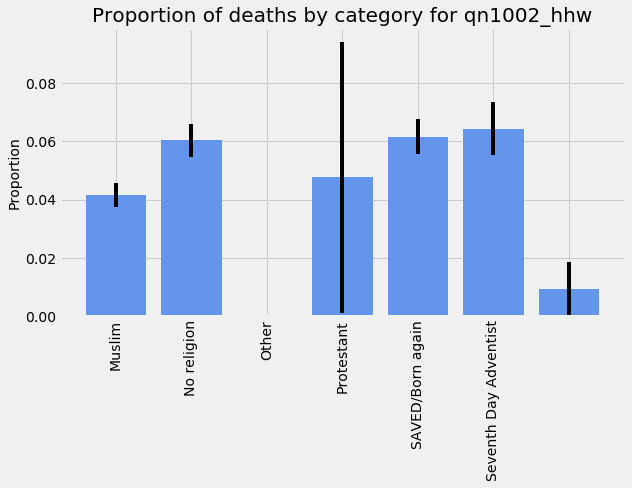

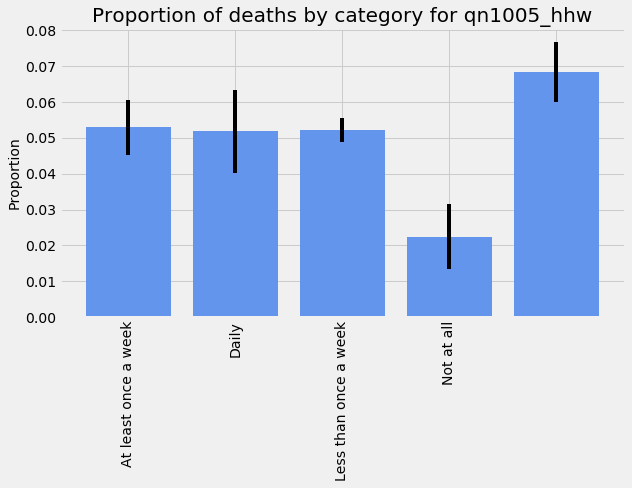

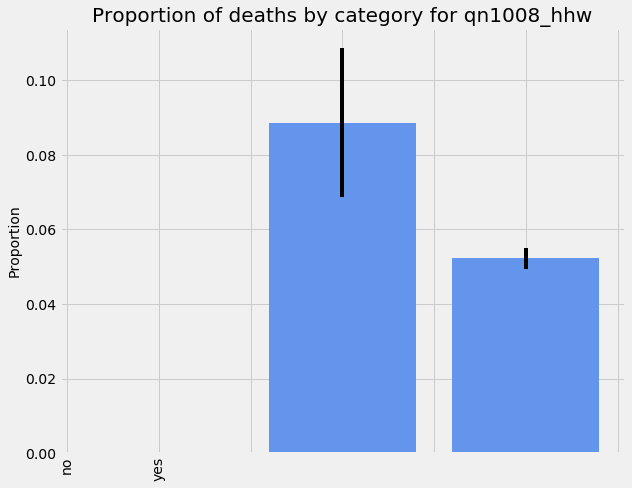

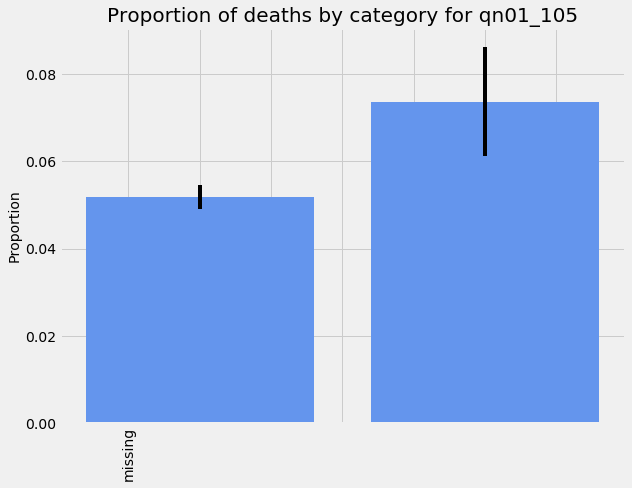

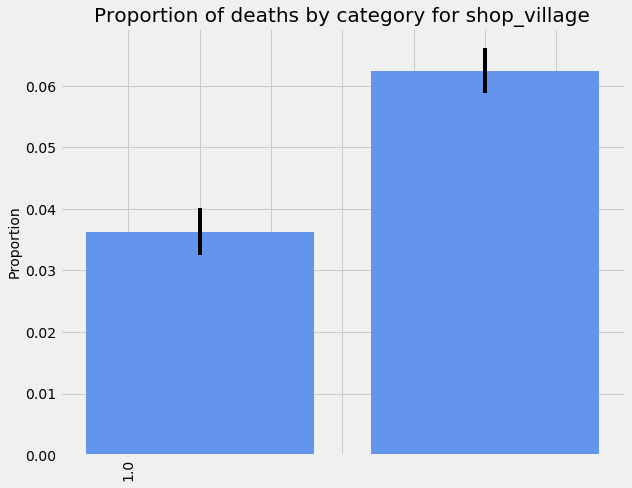

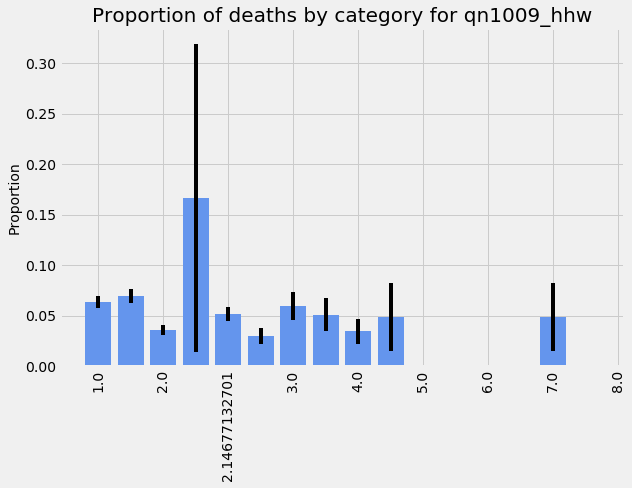

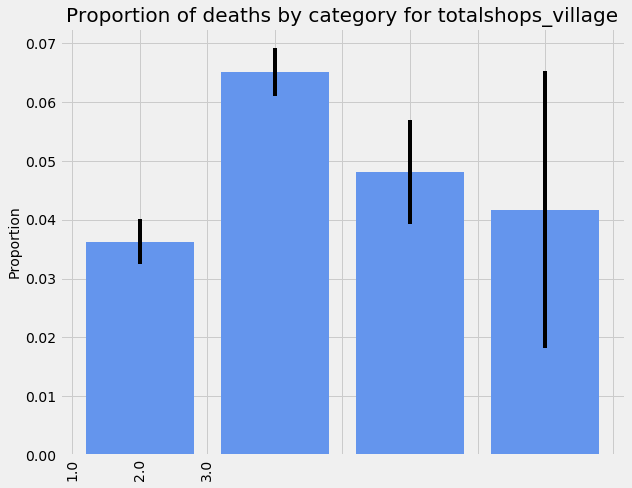

In [59]:
for test in test_results:
    if (test[1] < 0.10) & (not test[1] is None):
        plot_feature_proportions(test[0])

In [79]:
for test in test_results:
    if (test[1] < 0.10) & (not test[1] is None):
        print test

('district_name', 3.9530068029998376e-11)
('subcounty_name', 7.7663581479826325e-10)
('parish_name', 3.8770528848572744e-11)
('village_name_old', 1.8088731898760795e-07)
('qn204_know', 0.015732693976202028)
('qn205_know', 0.071554718278568047)
('qn209b_know', 0.03232466838355473)
('qn210_know', 0.023659893496828725)
('qn211a_know', 0.027190714743146108)
('qn211b_know', 0.051108664808094957)
('qn211c_know', 0.071922609425635595)
('qn212_know', 0.055765328236581362)
('qn216_know', 0.0024811452720023995)
('qn217_know', 4.1734943291762372e-05)
('qn1002_hhw', 0.010025559581432253)
('qn1005_hhw', 0.057899035327918881)
('qn1008_hhw', 0.064880318180595822)
('qn01_105', 0.049729368926687945)
('shop_village', 4.9017612035980309e-06)
('qn1009_hhw', 0.0021865108784860773)
('totalshops_village', 0.0029485957739902309)


## Fitting a Machine Learning Model

In [148]:
from data_preparation import DataPreparation

In [149]:
dp = DataPreparation()
dp._read_data()
df = dp._data

In [28]:
df.parish_name.value_counts()

KONKOMA            544
MAFUBIRA           537
BUWENDA            497
BUMOOZI            489
MAZIBA             457
KYALI              406
WANYANGE           396
NAMULESA           370
BUWEKULA           344
WARD B             315
WARD A             311
KAKOOLA            299
KAFUMU             261
LWANGA             244
WARD D             188
WANYAMA WARD       183
BUDUMBULI WEST     130
NAKANYONYI WARD    122
BUDUMBULI EAST     119
NAKANYONYI         117
KATENDE WARD        70
MAWOITO             68
WARD C              63
BUBEZI              61
WANYAMA             58
BUGEMBE WARD        55
KATENDE             54
Name: parish_name, dtype: int64

In [32]:
df.groupby('parish_name').mean()['died'].sort_values(ascending=False)

parish_name
KATENDE WARD       0.142857
WANYAMA            0.120690
BUDUMBULI EAST     0.117647
BUWENDA            0.114688
BUDUMBULI WEST     0.100000
KATENDE            0.074074
WANYANGE           0.073232
NAKANYONYI WARD    0.057377
MAFUBIRA           0.055866
BUWEKULA           0.055233
BUMOOZI            0.055215
NAKANYONYI         0.051282
KAKOOLA            0.050167
NAMULESA           0.048649
WARD A             0.045016
MAWOITO            0.044118
WANYAMA WARD       0.043716
LWANGA             0.040984
MAZIBA             0.039387
BUGEMBE WARD       0.036364
BUBEZI             0.032787
KONKOMA            0.031250
WARD B             0.028571
KAFUMU             0.026820
KYALI              0.022167
WARD D             0.021277
WARD C             0.015873
Name: died, dtype: float64